Importing libraries

In [5]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading data

In [6]:
data = pd.read_csv(r"C:\Users\FreeComp\Desktop\market price prediction\MarketPricePrediction.csv")
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


Data Preprocessing

In [7]:
# Handle missing values
data.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [9]:
data.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [10]:
# Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%B-%Y')

In [11]:
# Set the date column as the index
data.set_index('date', inplace=True)

In [12]:
# Dropping unnecessary columns
data = data[['priceMod']]

In [15]:
data.head()

,priceMod
date,
2005-01-01,446
2006-01-01,563
2010-01-01,1460
2011-01-01,3433
2012-01-01,605


Exploratory Data Analysis (EDA)

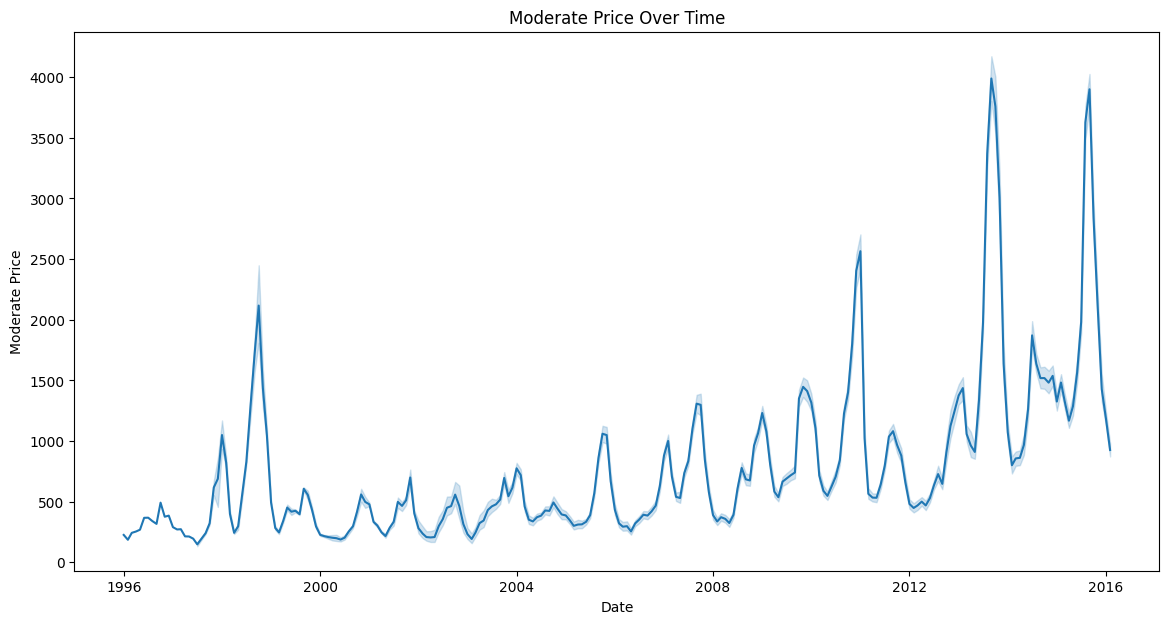

In [17]:
# Plotting the priceMod over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='date', y='priceMod')
plt.title('Moderate Price Over Time')
plt.xlabel('Date')
plt.ylabel('Moderate Price')
plt.show()

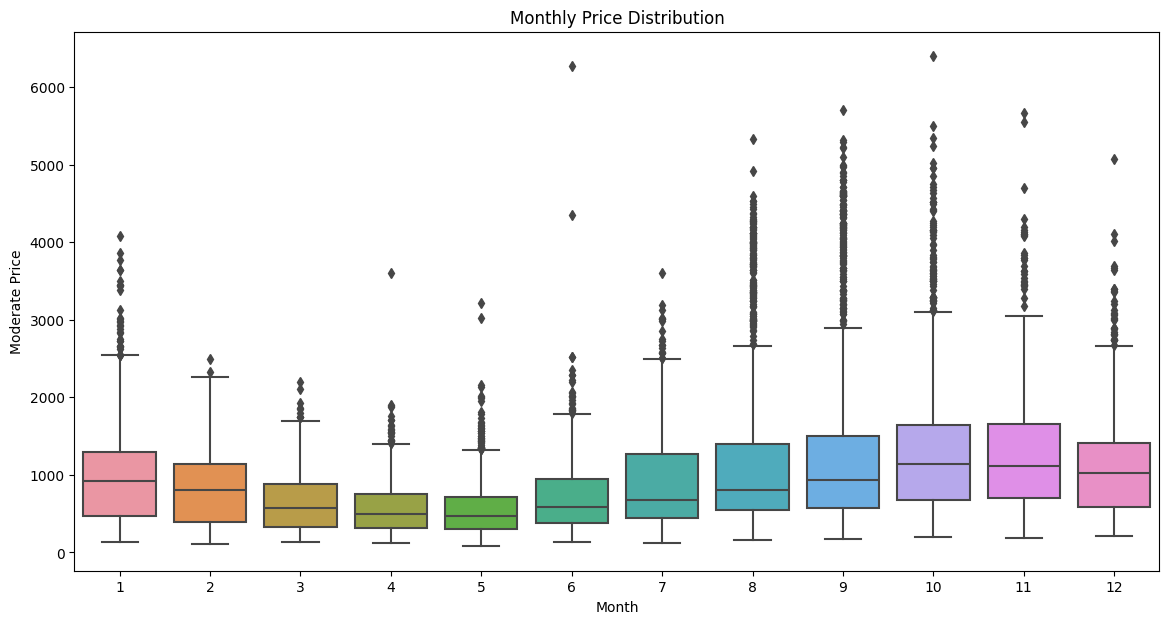

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='month', y='priceMod')
plt.title('Monthly Price Distribution')
plt.xlabel('Month')
plt.ylabel('Moderate Price')
plt.show()

Model Selection and Training

In [23]:
from sklearn.preprocessing import MinMaxScaler
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features] for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

In [24]:
X_train, X_val ,X_test = X[0:7151], X[7151:9500],X[9500:]
Y_train, Y_val , Y_test = Y[0:7151], Y[7151:9500],Y[9500:]
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7151, 10, 1), (716, 10, 1), (7151,), (716,))

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=1, verbose=1)



Epoch 1/10

7151/7151 [==============================] - 92s 12ms/step - loss: 0.0145 - val_loss: 0.0124
Epoch 2/10
7151/7151 [==============================] - 93s 13ms/step - loss: 0.0128 - val_loss: 0.0121
Epoch 3/10
7151/7151 [==============================] - 95s 13ms/step - loss: 0.0121 - val_loss: 0.0130
Epoch 4/10
7151/7151 [==============================] - 94s 13ms/step - loss: 0.0112 - val_loss: 0.0106
Epoch 5/10
7151/7151 [==============================] - 146s 20ms/step - loss: 0.0107 - val_loss: 0.0096
Epoch 6/10
7151/7151 [==============================] - 65s 9ms/step - loss: 0.0103 - val_loss: 0.0094
Epoch 7/10
7151/7151 [==============================] - 65s 9ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 8/10
7151/7151 [==============================] - 65s 9ms/step - loss: 0.0090 - val_loss: 0.0083
Epoch 9/10
7151/7151 [==============================] - 65s 9ms/step - loss: 0.0086 - val_loss: 0.0082
Epoch 10/10
7151/7151 [==============================] - 66s 9ms

Model Evaluation

In [26]:
test_evaluate = model.evaluate(X_test, Y_test)

23/23 [==============================] - 1s 7ms/step - loss: 0.0092


In [27]:
train_evaluate = model.evaluate(X_train, Y_train)

224/224 [==============================] - 1s 4ms/step - loss: 0.0070


Fine-tuning and Validation

In [28]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':Y_train})
train_results

224/224 [==============================] - 2s 3ms/step


,Train Predictions,Actuals
0,0.092499,0.196519
1,0.080013,0.165348
2,0.154179,0.077532
3,0.128190,0.245095
4,0.177484,0.142880
...,...,...
7146,0.079256,0.121835
7147,0.126882,0.034494
7148,0.032815,0.058544
7149,0.076100,0.018354


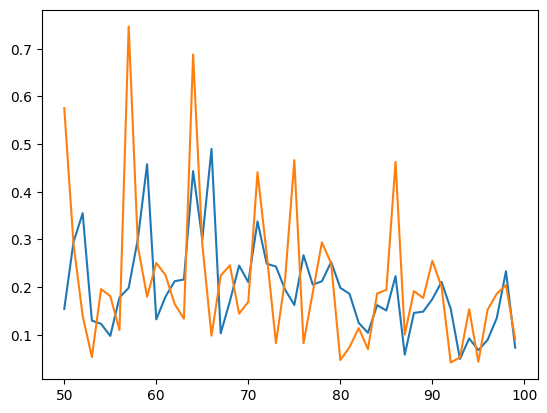

In [29]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [30]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals(test)':Y_test})
test_results

23/23 [==============================] - 0s 6ms/step


,Test Predictions,Actuals(test)
0,0.056178,0.024525
1,0.101664,0.089557
2,0.045733,0.056487
3,0.082695,0.056646
4,0.095544,0.118829
...,...,...
711,0.181335,0.276899
712,0.055838,0.070570
713,0.075962,0.167089
714,0.164541,0.173576


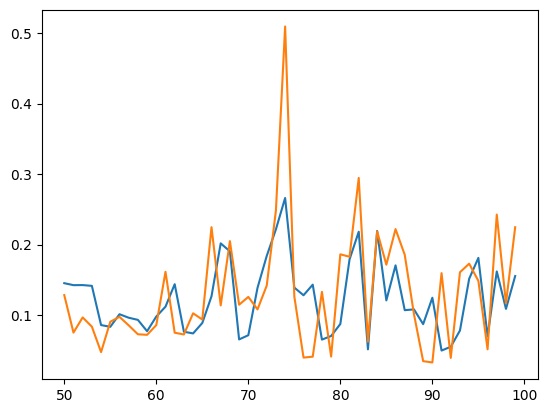

In [31]:
plt.plot(test_results['Test Predictions'][50:100])
plt.plot(test_results['Actuals(test)'][50:100])

quantity

In [32]:
# Load the dataset
file_path = 'MarketPricePrediction.csv'
data = pd.read_csv(file_path)

# Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%B-%Y')

# Set the date column as the index
data.set_index('date', inplace=True)

# Dropping unnecessary columns
data = data[['quantity']]

# Display the first few rows of the dataset
data.head()

,quantity
date,
2005-01-01,2350
2006-01-01,900
2010-01-01,790
2011-01-01,245
2012-01-01,1035


In [33]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [34]:
X_train, X_val ,X_test = X[0:7151], X[7151:9500],X[9500:]
Y_train, Y_val , Y_test = Y[0:7151], Y[7151:9500],Y[9500:]
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7151, 10, 1), (716, 10, 1), (7151,), (716,))

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=1, verbose=1)

Epoch 1/10
7151/7151 [==============================] - 53s 7ms/step - loss: 0.0141 - val_loss: 0.0119
Epoch 2/10
7151/7151 [==============================] - 47s 7ms/step - loss: 0.0127 - val_loss: 0.0116
Epoch 3/10
7151/7151 [==============================] - 47s 7ms/step - loss: 0.0119 - val_loss: 0.0110
Epoch 4/10
7151/7151 [==============================] - 47s 7ms/step - loss: 0.0111 - val_loss: 0.0104
Epoch 5/10
7151/7151 [==============================] - 47s 7ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 6/10
7151/7151 [==============================] - 60s 8ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 7/10
7151/7151 [==============================] - 50s 7ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 8/10
7151/7151 [==============================] - 48s 7ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
7151/7151 [==============================] - 45s 6ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 10/10
7151/7151 [==============================] - 45s 6ms/step - l

In [36]:
test_evaluate = model.evaluate(X_test, Y_test)

23/23 [==============================] - 2s 5ms/step - loss: 0.0098


In [37]:
train_evaluate = model.evaluate(X_train, Y_train)

224/224 [==============================] - 1s 4ms/step - loss: 0.0074


In [38]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':Y_train})
train_results

224/224 [==============================] - 2s 3ms/step


,Train Predictions,Actuals
0,0.055306,0.196519
1,0.100602,0.165348
2,0.126646,0.077532
3,0.169921,0.245095
4,0.110502,0.142880
...,...,...
7146,0.102893,0.121835
7147,0.129940,0.034494
7148,0.025695,0.058544
7149,0.060246,0.018354


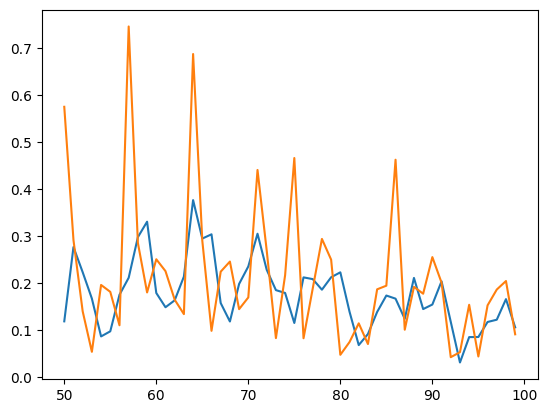

In [39]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [40]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals(test)':Y_test})
test_results

23/23 [==============================] - 0s 7ms/step


,Test Predictions,Actuals(test)
0,0.043997,0.024525
1,0.092066,0.089557
2,0.065140,0.056487
3,0.087349,0.056646
4,0.106849,0.118829
...,...,...
711,0.151554,0.276899
712,0.082689,0.070570
713,0.128895,0.167089
714,0.176455,0.173576


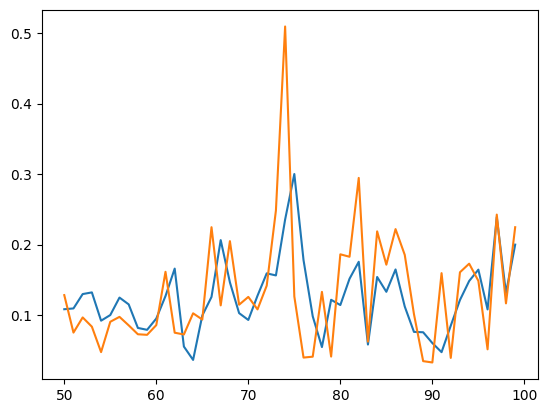

In [41]:
plt.plot(test_results['Test Predictions'][50:100])
plt.plot(test_results['Actuals(test)'][50:100])